## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is predicting a numeric outcome, whereas classification is predicting a categorical outcome. The fundamental quantity of interest for regression residuals is the difference between predicted and actual values. The fundamental quantity of interest for classification is the cross-tabulation of predicted and actual values.

2. A confusion table is used for classification, and is the cross-tabulation of predicted and actual values. This table can tell us whether a model is doing well or poorly, and whether those errors are asymmetric or not.

3. The SSE is a measure of how far the predicted values are from the true values. It is used in regression to aggregate the squared errors into a single metric of fit after the residuals are used to visualize success or failure of the model.

4. Overfitting occurs when the model is too complex to reliably explain the interested phenenomenon. Contradictionarly, underfitting occurs when the model is too simple to reliably explain the interested phenomenon.

5. Splitting the data into a training and testing set is a effective data-driven strategy to randomly split the data. Splitting the sample substitutes uncertainity about future predictions for uncertainity about the hold-out data in order to test the model. It is a helpful method to conceptualize tools for model selection. Picking the k that achieves the lowest SSE is valuable because the model and data do not prescribe the value of k and other naive ways of picking it can lead to bad predictive models.

6. A prediction would have a single decision. The class label would give a definite decision, but does not offer insight into the confidence levels of the model. Therefore, if it is wrong, there is no method to tell how close it was to the correct answer. A probability output does not make a single, final decision and is also more complex than a prediction. However, it shows the likelihood of each class. This gives more information to the user and provides detailed confidence levels for each possible class. A probability output also allows for class ranking.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
#import pandas, matplotlib, numpy, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load the cars dataset
url = "https://raw.githubusercontent.com/annieedmonds/knn_assignment/refs/heads/main/data/USA_cars_datasets.csv"
df_cars = pd.read_csv(url)
df_cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
#Keep the following variables and drop the rest: price, year, mileage
df_cars = df_cars[['price', 'year', 'mileage']]
df_cars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [4]:
df_cars.shape
df_cars.isna().sum()

,0
price,0
year,0
mileage,0


There are no NAs to account for.

**2. Maxmin normalize year and mileage.**

In [5]:
#maxmin normalization function
def maxmin(z):
  z= (z-min(z))/(max(z)-min(z))
  return(z)
#apply maxmin normalization to 'year' and 'mileage'
df_cars[['year', 'mileage']] = df_cars[['year', 'mileage']].apply(maxmin)
df_cars.head()



,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


**3. Split the sample into ~80% for training and ~20% for evaluation.**

In [6]:
#Set variables
X = df_cars[['year', 'mileage']]
y = df_cars['price']
#Split the sample into ~80% for training and ~20% for evaluation.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

**4. Use the  𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?**

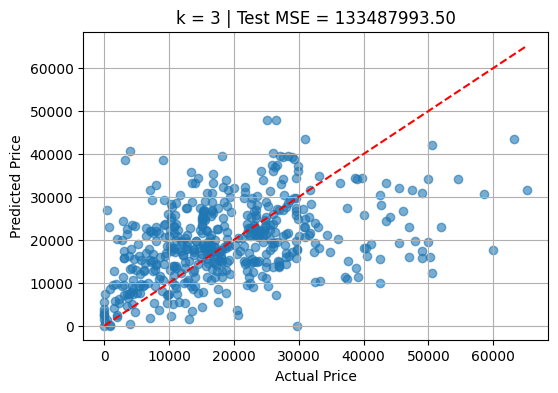

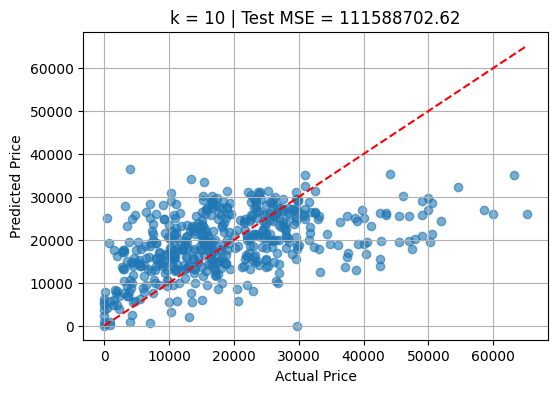

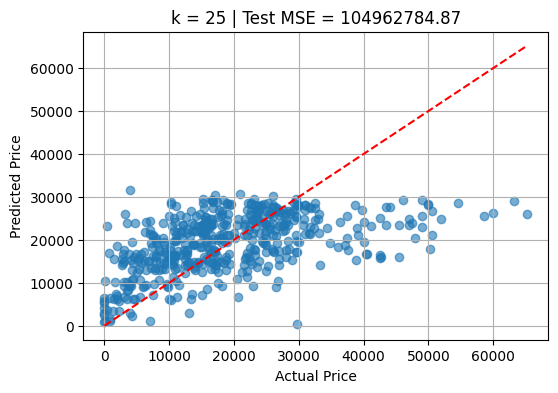

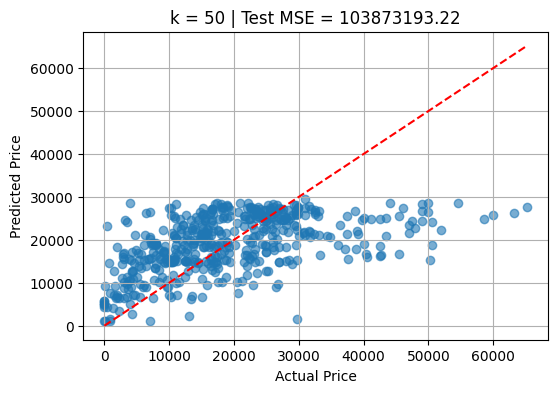

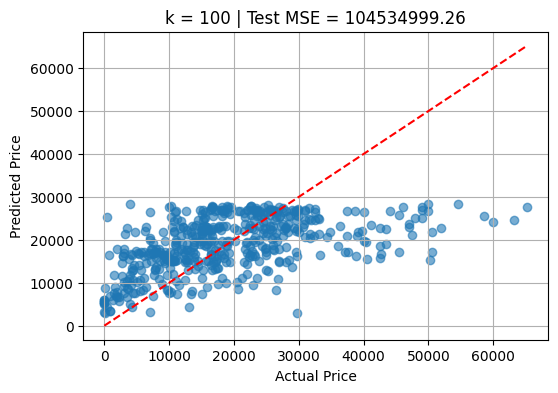

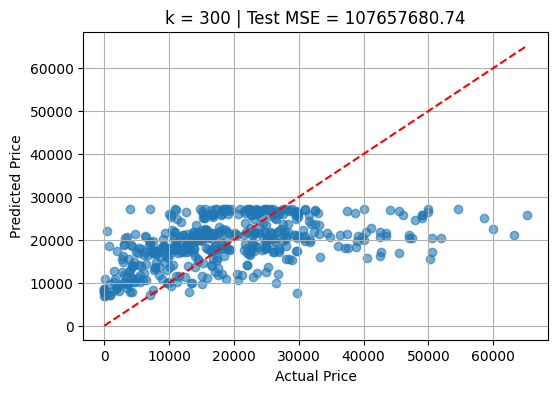

In [7]:
#Use the 𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for 𝑘=3,10,25,50,100,300 .

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#ks to try
ks = [3,10,25,50,100,300]
MSE_test =[]
MSE_train = [] #saves the training error

#loop over each k value
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train) # Train the model on our data

    y_hat = fitted_model.predict(X_test) # Predict values for test set
    mse_test = mean_squared_error(y_test, y_hat) # Compute MSE for test set
    MSE_test.append(mse_test) # Save the computed MSE for test set

    y_hat_train = fitted_model.predict(X_train) # Predict values for training set
    mse_train = mean_squared_error(y_train, y_hat_train) # Compute MSE for training set
    MSE_train.append(mse_train)


    #Scatterplot
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_hat, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k} | Test MSE = {mse_test:.2f}")
    plt.grid(True)
    plt.show()


What patterns do you notice as you increase k?
As k increases the predicted price and the actual price difference becomes more and more similar. It seems to be averaging out as there are more nearby points included. There also seem to be less outliers at k increases.

**5. Determine the optimal  𝑘  for these data.**

In [8]:
#Determine the optimal k
optimal_k = ks[np.argmin(MSE_test)]
print(f"The optimal k is {optimal_k}")

The optimal k is 50


**6. Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)**

When k is small, such as k = 3, the model experiences overfitting, where the model is too complex to reliably explain the relationship between predicted price and actual price. This is seen in the scatterplot where the predicted prices fluctuate and do not align well with the actual prices. When k is very large, such as k = 300, the model averages over too many data points, losing variations. This leads to underfitting, where the model is too simple to reliably explain the relationship between actual and predicted prices. In this scatterplot, predictions cluster around the average price. The optimal k value of 50 avoids both underfitting and overfitting. It includes enough neighbors to avoid being too sensitive, but still has enough detail to show patterns in the data. This scatterplot best shows that predicted prices align with the actual prices.


**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.